<h1>Citibike Network Assignment</h1>
<li>The file, 201809-citibike-tripdata.csv, contains citibike trip data from September 2018 (a reasonable sized file!)
<li>The data:<br>
"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
<li>Each record in the data is a trip 
<li>The data is described at https://www.citibikenyc.com/system-data

<h1>STEP 1: Read the data into a dataframe</h1>
<li>Convert station ids to str if necessary

In [8]:
import pandas as pd
import numpy as np
datafile = "201801-citibike-tripdata.csv"
df = pd.read_csv(datafile)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718994 entries, 0 to 718993
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             718994 non-null  int64  
 1   starttime                718994 non-null  object 
 2   stoptime                 718994 non-null  object 
 3   start station id         718994 non-null  int64  
 4   start station name       718994 non-null  object 
 5   start station latitude   718994 non-null  float64
 6   start station longitude  718994 non-null  float64
 7   end station id           718994 non-null  int64  
 8   end station name         718994 non-null  object 
 9   end station latitude     718994 non-null  float64
 10  end station longitude    718994 non-null  float64
 11  bikeid                   718994 non-null  int64  
 12  usertype                 718994 non-null  object 
 13  birth year               718994 non-null  int64  
 14  gend

<h1>STEP 2: Basic cleaning</h1>
<li>Remove data that have any nans in any row (none in this file but others do have nans)
<li>and convert stationids to str 

In [11]:
df.dropna()
df['start station id']=df['start station id'].astype(str)
df['end station id']=df['end station id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718994 entries, 0 to 718993
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             718994 non-null  int64  
 1   starttime                718994 non-null  object 
 2   stoptime                 718994 non-null  object 
 3   start station id         718994 non-null  object 
 4   start station name       718994 non-null  object 
 5   start station latitude   718994 non-null  float64
 6   start station longitude  718994 non-null  float64
 7   end station id           718994 non-null  object 
 8   end station name         718994 non-null  object 
 9   end station latitude     718994 non-null  float64
 10  end station longitude    718994 non-null  float64
 11  bikeid                   718994 non-null  int64  
 12  usertype                 718994 non-null  object 
 13  birth year               718994 non-null  int64  
 14  gend

<h1>STEP 3: Write a function that returns a graph given a citibike data frame</h1> 
<li>Your function should return two things:
<ol>
<li>a graph
<li>a dictionary with station ids as the key and station name as the value
</ol>
<li>The graph should contain 
<ol>
<li>nodes (station ids)
<li>edges (station id, station id)
<li>edge data 
<ol>
<li>count: number of trips on the edge
<li>time: average duration - pickup to dropoff - on that edge
</ol>
</ol>
<li><b>Note:</b> the edge (x1,y1) is the same as (y1,x1) even though the start station ids and end station ids are flipped in the dataframe

In [105]:
def get_citibike_graph(df):
    import networkx as nx
    G = nx.Graph()
    node_names = dict()
    count=[]

    ### create the node_names
    a1=list(df['start station id'].unique())
    a2=list(df['end station id'].unique())
    a3=a1+a2
    nodes=list(set(a3))
    start=df[['start station id','start station name']]
    end=df[['end station id','end station name']]
    for item in nodes:
        if not start[start['start station id']==item].empty:
            node_names[item]=start.where(start['start station id']==item).dropna().iloc[0][1]
        else:
            node_names[item]=end.where(end['end station id']==item).dropna().iloc[0][1]
    
    ### get the edges
    data=df[['tripduration','start station id','end station id']]
    data['num']=1
    duration=data.groupby(['start station id','end station id'])['tripduration'].mean()
    visit=data.groupby(['start station id','end station id'])['num'].sum()
    path=duration.index

    for s,e in path:
        if not G.has_edge(s,e):
            G.add_edge(s,e,count=visit.loc[(s,e)],time=duration.loc[(s,e)])
        else:
            c1=G[s][e]['count']
            t1=G[s][e]['time']
            G[s][e]['count']=c1+visit.loc[(s,e)]
            G[s][e]['time']=(t1*c1+visit.loc[(s,e)]*duration.loc[(s,e)])/(c1+visit.loc[(s,e)])
            
        
    
    
    
    
    return G,node_names
    

In [110]:
len(G.edges())

70670

<h1>STEP 4: Create the following graphs using the function above</h1>
<li>G: A graph of all the data in the dataframe
<li>m_G: A graph containing only data from male riders
<li>f_G: A graph containing only data from female riders
<li>Note: for m_G and f_G you will need to extract data from the dataframe

In [106]:
G,nodes=get_citibike_graph(df)

<ipython-input-105-8b709e695837>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num']=1


In [113]:
G.edges(data=True)

EdgeDataView([('119', '119', {'count': 1, 'time': 4516.0}), ('119', '128', {'count': 5, 'time': 1359.8}), ('119', '144', {'count': 2, 'time': 214.0}), ('119', '2000', {'count': 4, 'time': 630.75}), ('119', '2001', {'count': 2, 'time': 760.5}), ('119', '2003', {'count': 1, 'time': 1067.0}), ('119', '232', {'count': 1, 'time': 589.0}), ('119', '239', {'count': 106, 'time': 246.20754716981133}), ('119', '243', {'count': 26, 'time': 306.53846153846155}), ('119', '245', {'count': 4, 'time': 131.25}), ('119', '261', {'count': 26, 'time': 185.5}), ('119', '262', {'count': 2, 'time': 270.0}), ('119', '270', {'count': 2, 'time': 258.5}), ('119', '274', {'count': 3, 'time': 442.0}), ('119', '278', {'count': 1, 'time': 395.0}), ('119', '296', {'count': 7, 'time': 992.4285714285714}), ('119', '3016', {'count': 3, 'time': 1337.0}), ('119', '3058', {'count': 1, 'time': 2170.0}), ('119', '3088', {'count': 1, 'time': 1553.0}), ('119', '3093', {'count': 1, 'time': 1656.0}), ('119', '310', {'count': 3, 

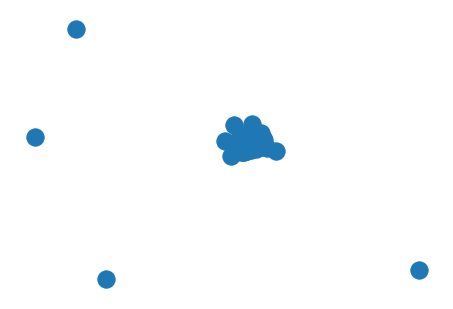

In [111]:
import networkx as nx
%matplotlib inline
nx.draw(G)

In [114]:
maledf = df[df['gender']==1]
femaledf = df[df['gender']==2]
f_G = get_citibike_graph(femaledf)[0]
m_G = get_citibike_graph(maledf)[0]

<ipython-input-105-8b709e695837>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num']=1
<ipython-input-105-8b709e695837>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num']=1


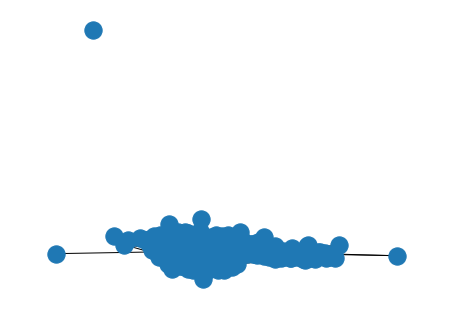

In [118]:
nx.draw(f_G)

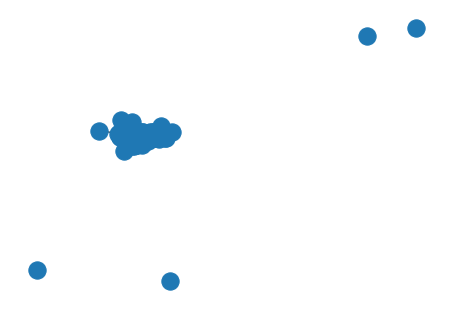

In [119]:
nx.draw(m_G)

<h1>STEP 5: Answer the following questions for each of the graphs</h1>
<ol>
<li>Which station (name) is the best connected (max degree)?
<li>Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs. Report both the two stations as well as the time in minutes
<li>Which edge is associated with the most number of trips?
<li>Which station is the most central?
<li>Which node is a bottleneck node?

Which station (name) has the greatest number of connections (max degree)?

In [120]:
d1=nx.degree(G)
l1=list(d1)
name1=max(l1,key=lambda x: x[1])[0]
print('Busiest station is %s' % nodes[name1])

Busiest station is Pershing Square North


In [121]:
d2=nx.degree(f_G)
l2=list(d2)
name2=max(l2,key=lambda x: x[1])[0]
print('Busiest female station is %s' % nodes[name2])

Busiest female station is Pershing Square North


In [122]:
d3=nx.degree(m_G)
l3=list(d3)
name3=max(l3,key=lambda x: x[1])[0]
print('Busiest male station is %s' % nodes[name3])

Busiest female station is Pershing Square North


Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs

In [139]:
edge1=[]
for item in G.edges.items():
    edge1.append(item)
m1=max(edge1,key=lambda x: x[1]['time'])
print('Longest average distance all:'+ str(nodes[m1[0][0]])+'to'+str(nodes[m1[0][1]])+'. Munites:'+str(m1[1]['time']/60))

Longest average distance all:Nassau St & Navy SttoHope St & Union Ave. Munites:325167.48333333334


In [141]:
edge2=[]
for item in f_G.edges.items():
    edge2.append(item)
m2=max(edge2,key=lambda x: x[1]['time'])
print('Longest average distance females:'+ str(nodes[m2[0][0]])+'to'+str(nodes[m2[0][1]])+'. Munites:'+str(m2[1]['time']/60))

Longest average distance females:Adelphi St & Myrtle AvetoNYCBS Depot - 3AV. Munites:73698.81666666667


In [142]:
edge3=[]
for item in m_G.edges.items():
    edge3.append(item)
m3=max(edge3,key=lambda x: x[1]['time'])
print('Longest average distance males:'+ str(nodes[m3[0][0]])+'to'+str(nodes[m3[0][1]])+'. Munites:'+str(m3[1]['time']/60))

Longest average distance males:Nassau St & Navy SttoHope St & Union Ave. Munites:325167.48333333334


Which edge is associated with the most number of trips?

In [143]:
edge1=[]
for item in G.edges.items():
    edge1.append(item)
m1=max(edge1,key=lambda x: x[1]['count'])
print('most trip route all:'+ str(nodes[m1[0][0]])+'to'+str(nodes[m1[0][1]])+'. Munites:'+str(m1[1]['time']/60))

most trip route all:Cooper Square & Astor PltoE 7 St & Avenue A. Munites:4.3187380952380945


In [144]:
edge2=[]
for item in f_G.edges.items():
    edge2.append(item)
m2=max(edge2,key=lambda x: x[1]['count'])
print('most trip route females:'+ str(nodes[m2[0][0]])+'to'+str(nodes[m2[0][1]])+'. Munites:'+str(m2[1]['time']/60))

most trip route females:Cooper Square & Astor PltoE 7 St & Avenue A. Munites:4.628260869565218


In [145]:
edge3=[]
for item in m_G.edges.items():
    edge3.append(item)
m3=max(edge3,key=lambda x: x[1]['count'])
print('most trip route males:'+ str(nodes[m3[0][0]])+'to'+str(nodes[m3[0][1]])+'. Munites:'+str(m3[1]['time']/60))

most trip route males:Cooper Square & Astor PltoE 7 St & Avenue A. Munites:4.225484677923702


<h2>Centrality</h2>
One of the concerns that the citibike system has to deal with is ensuring that no station has empty slots (a bike should always be available) and that no station should have no empty slots (you should be able to return a bike). To do this, it needs to monitor the movement of bikes through the system, ideally using a directed graph. Though our graph is not directed, we can look at some network characteristics that will help us answer these questions. Note that the "trips" feature in edge data captures flows.
<li>Which node is a possible bottleneck node in terms of bike flows?
<li>Which node is the "nearest" to all other nodes (irrespective of flows)
<li>Which node is the "nearest" to all other nodes (in terms of distance = time)


In [147]:
from networkx.algorithms import closeness_centrality,betweenness_centrality
c_G = closeness_centrality(G)
c_G1 = closeness_centrality(G,distance='time')
b_G = betweenness_centrality(G,weight='count')
print("Most central in connectivity",nodes[max(c_G.items(),key=lambda x: x[1])[0]])
print("Most central in connectivity using time as distance",nodes[max(c_G1.items(),key=lambda x: x[1])[0]])
print("Bottleneck node",nodes[max(b_G.items(),key=lambda x: x[1])[0]])

KeyboardInterrupt: 